**Chuẩn bị các thư viện**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle


### Giới thiệu về K-NN (Lazy Learning)
K-Nearest Neighbors (KNN) là một trong những thuật toán học có giám sát đơn giản và phổ biến nhất, thường được sử dụng trong khai phá dữ liệu và học máy. KNN là một phương pháp lazy learning vì nó không thực hiện quá trình học tập trên dữ liệu huấn luyện, thay vào đó toàn bộ tính toán được thực hiện khi dự đoán.

### Ý tưởng của KNN
KNN dự đoán nhãn cho một dữ liệu mới bằng cách tìm K điểm gần nhất trong tập dữ liệu huấn luyện và lấy đa số nhãn của các điểm đó làm nhãn cho dữ liệu mới.

### Ví dụ minh họa KNN
Giả sử trong lớp có 50 học sinh, mỗi bạn được đánh giá theo điểm trung bình và xếp loại theo quy tắc của giáo viên.

Câu hỏi đặt ra: Nếu tôi đạt 7 điểm, tôi sẽ được xếp loại như thế nào?

Khảo sát 5 học sinh có điểm gần nhất với tôi:
* 7.1 → Khá
* 7.2 → Khá
* 6.7 → Khá
* 6.6 → Khá
* 6.4 → Trung bình

Kết luận: Với 4/5 học sinh được xếp loại Khá (80%), dự báo tôi sẽ được xếp loại Khá.

### Thiết lập ngưỡng phân loại
* Ngưỡng 50%: Nếu số lượng nhãn "Khá" >= 50%, dự báo là "Khá".

→ Kết quả: Với 80% Khá, tôi được xếp loại Khá.

* Ngưỡng 60%: Nếu nhãn "Khá" >= 60%, dự báo là "Khá".

→ Kết quả: Với 80%, tôi vẫn được xếp loại Khá.

* Ngưỡng 85%: Nếu nhãn "Khá" >= 85%, thì dự báo là "Khá".

→ Kết quả: Với chỉ 80%, không đủ để xác định rõ ràng nhãn theo ngưỡng 85%.

### Giải thuật KNN - Các bước thực hiện
* 1. Nạp dữ liệu huấn luyện và kiểm tra.
* 2. Chọn giá trị K (số lượng hàng xóm gần nhất).
* 3. Với mỗi điểm trong tập kiểm tra:
  * 3.1: Tính khoảng cách giữa điểm cần dự đoán và các điểm trong tập huấn luyện.
  * 3.2: Lấy K điểm gần nhất từ danh sách đã sắp xếp và gán nhãn chiếm ưu thế cho điểm đang xét.
  
Kết thúc: Hoàn thành việc dự đoán cho tất cả các điểm kiểm tra.

### Công thức tính khoảng cách phổ biến
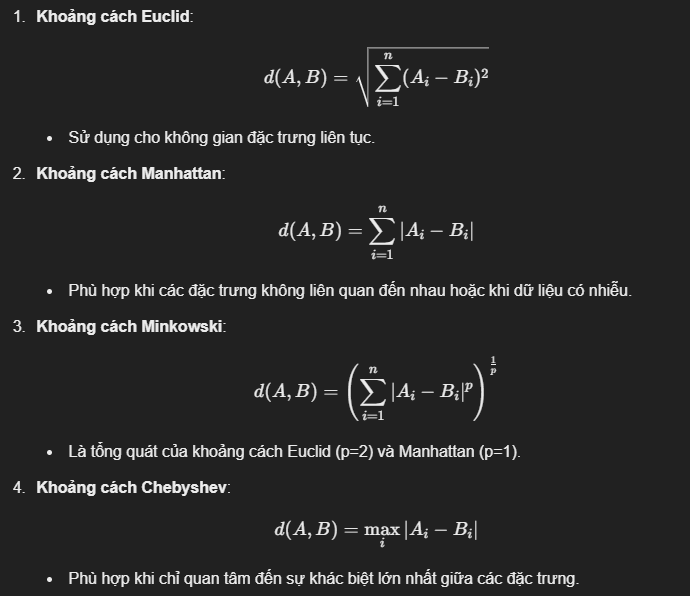

Thường dùng nhất là Euclid

In [49]:
df = pd.read_excel('data/heart_short.xlsx',sheet_name="data")
df.head(n=5)

,t_index,c_index,target
0,145,233,1
1,130,250,1
2,130,204,1
3,130,254,0
4,140,203,0


In [50]:
# Xác định input
X = df[['t_index','c_index']].values

# Xác định output
y = df[['target']].values 

# Ép kiểu dữ liệu
X = X.astype(float)
y = y.astype(float)

# Cắt dữ liệu chia ra 2 thành phần
# một phần là cho test, phần còn lại cho train
# random_state: settings chia ngẫu nhiên

# Chia dữ liệu ra thành tập train và test
# 70% dữ liệu cho train, 30% cho test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

# Khai báo mô hình KNN với số hàng xóm (neighbors) = 5
knnModel = KNeighborsClassifier(n_neighbors=5)

# Huấn luyện mô hình với tập train
knnModel.fit(X_train, y_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

### Accuracy (độ chính xác) 
là một chỉ số đo lường hiệu suất của mô hình học máy, đặc biệt là trong các bài toán phân loại (classification). Nó thể hiện tỷ lệ phần trăm các dự đoán đúng so với tổng số dự đoán.

### Công thức tính Accuracy
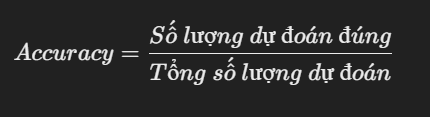


In [51]:
# Dự đoán nhãn cho tập X_test
y_test_predicted = knnModel.predict(X_test)

# Hiển thị các giá trị dự đoán
print("Dự báo nhãn cho tập X_test:")
print(' '.join(map(str, y_test_predicted)))

print("Thực tế nhãn:")
print(' '.join(map(str, y_test.flatten() if hasattr(y_test, 'flatten') else y_test)))

# Hoặc có thể sử dụng trực tiếp phương thức score() của mô hình KNN
accuracyKNNModel = knnModel.score(X_test, y_test) * 100
print(f"Độ chính xác từ knnModel: {accuracyKNNModel}%")

Dự báo nhãn cho tập X_test:
1.0 1.0 1.0 1.0
Thực tế nhãn:
1.0 0.0 0.0 1.0
Độ chính xác từ knnModel: 50.0%


### Confusion Matrix (Ma trận nhầm lẫn) 
là một công cụ phổ biến để đánh giá hiệu suất của mô hình phân loại. Nó hiển thị các giá trị dự đoán đúng và sai của mô hình dựa trên các nhãn dự đoán và nhãn thực tế trong bài toán phân loại. Confusion Matrix đặc biệt hữu ích khi bạn muốn biết chi tiết hơn về mô hình, đặc biệt là trong các bài toán có dữ liệu không cân bằng.

### Ma trận 

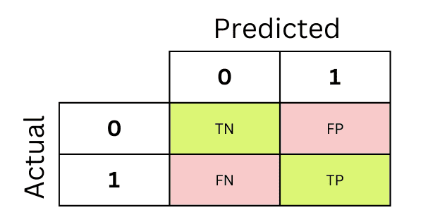

* True Positive (TP): Số lượng dự đoán dương đúng (mô hình dự đoán dương và thực tế cũng là dương).
* True Negative (TN): Số lượng dự đoán âm đúng (mô hình dự đoán âm và thực tế cũng là âm).
* False Positive (FP): Số lượng dự đoán dương sai (mô hình dự đoán dương nhưng thực tế là âm).
* False Negative (FN): Số lượng dự đoán âm sai (mô hình dự đoán âm nhưng thực tế là dương).

In [52]:
# Phương pháp Confusion - Matrix
cf_matrix = confusion_matrix(y_test, y_test_predicted)
cf_matrix

array([[0, 2],
       [0, 2]])

### Precision (Độ chính xác dương):

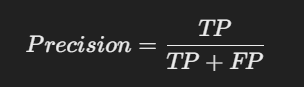
* Đây là tỷ lệ giữa số lượng dự đoán dương đúng (True Positive - TP) so với tổng số lần mô hình dự đoán dương (bao gồm cả True Positive và False Positive).
* Precision cao có nghĩa là trong các dự đoán dương, đa phần là đúng.
### Recall (Độ nhạy hay độ bao phủ):

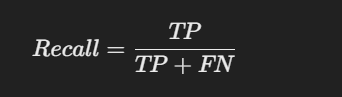
* Đây là tỷ lệ giữa số lượng dự đoán dương đúng (True Positive - TP) so với tổng số trường hợp thực tế dương (bao gồm cả True Positive và False Negative).
* Recall cao có nghĩa là mô hình không bỏ sót nhiều trường hợp thực tế dương.
### F1-score (Trung bình điều hòa của Precision và Recall):

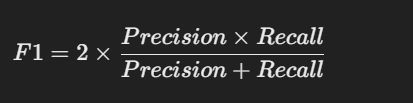
* F1-score cung cấp một sự cân bằng giữa Precision và Recall. F1 cao khi cả Precision và Recall đều cao.
* Nếu một trong hai giá trị Precision hoặc Recall thấp, F1-score cũng sẽ thấp, vì F1 là trung bình điều hòa.

In [53]:
# Tính precision, recall và F1 tổng thể
def myscores(smat): 
    tp = smat[1][1] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[0][0] 
    vprecision = tp/(tp+fp)
    vrecall = tp/(tp+fn)
    vf1 = 2*(vprecision*vrecall)/(vprecision+vrecall) 

    return vprecision,vrecall,vf1
print("precision, recall, f1:", myscores(cf_matrix))


precision, recall, f1: (np.float64(0.5), np.float64(1.0), np.float64(0.6666666666666666))


In [54]:
# Tính độ chính xác trên từng nhóm (từng nhãn)

target_names = ['Không bệnh', 'Có bệnh']
print(classification_report(y_test, y_test_predicted, target_names=target_names))

              precision    recall  f1-score   support

  Không bệnh       0.00      0.00      0.00         2
     Có bệnh       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

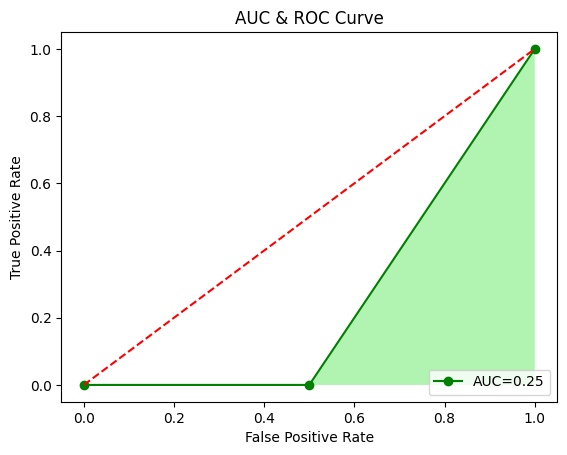

In [55]:
y_pred_proba = knnModel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,'go-',label="AUC="+str(auc))
plt.plot([0,1],[0,1],'r--')
plt.title("AUC & ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.fill_between(fpr, tpr, facecolor='lightgreen', alpha=0.7)
plt.show()

In [56]:
# Sử dụng thư viện pickle để lưu mô hình KNN đã huấn luyện (knnModel) vào
# file có tên 'model_KNN_Heart.sav' dưới dạng nhị phân (wb - write binary).
pickle.dump(knnModel, open('model/model_KNN_Heart.sav', 'wb'))

# Tải lại mô hình KNN đã được lưu trong file 'model_KNN_Heart.sav' vào biến 
# loaded_model để sử dụng cho việc dự đoán.
loaded_model = pickle.load(open('model/model_KNN_Heart.sav', 'rb'))

# Thực hiện nhập dữ liệu và dữ đoán
v1 = float(input('t_index: '))
v2 = float(input('f_status: '))

y_pred = loaded_model.predict([[v1,v2]])
print('Kết quả dự báo bệnh tim: '+ str(y_pred[0]))

if (y_pred[0] == 1):
    print("Bị bệnh tim")
else:
    print("Không bị bệnh")

Kết quả dự báo bệnh tim: 1.0
Bị bệnh tim
